# Tesla Stock MACD Indicator Testing - Mean and Standard Deviation Assumptions

We have used the powerful analytical library Pandas to analyze daily trends in Telsa stock between 2020-01-02 - 2021-06-29. 

Specifically, we have computed the Moving Averages of the daily Closing Price. Furthermore, we have calculated the distance between the MA's and the real line (daily closing price) - MACD. This ISOLATED MA analysis should give some weight in approximating the next data point to fall with a certain range based on MA statistical data we have gathered. Essentially, we can use this as an isolated technical indicator to help predict the trend. 

Feature of Interest: Closing Price

- Calculate the difference between the values in current row and previous row 
- Calculate the Simple Moving Average, Cumultive Moving Average and Exponential Moving Average  
- Calculate the distance between the MA's and the RL (Real Line) - (Oscillator Indicater MACD)

What assumptions can we make from the MACD statistics ?

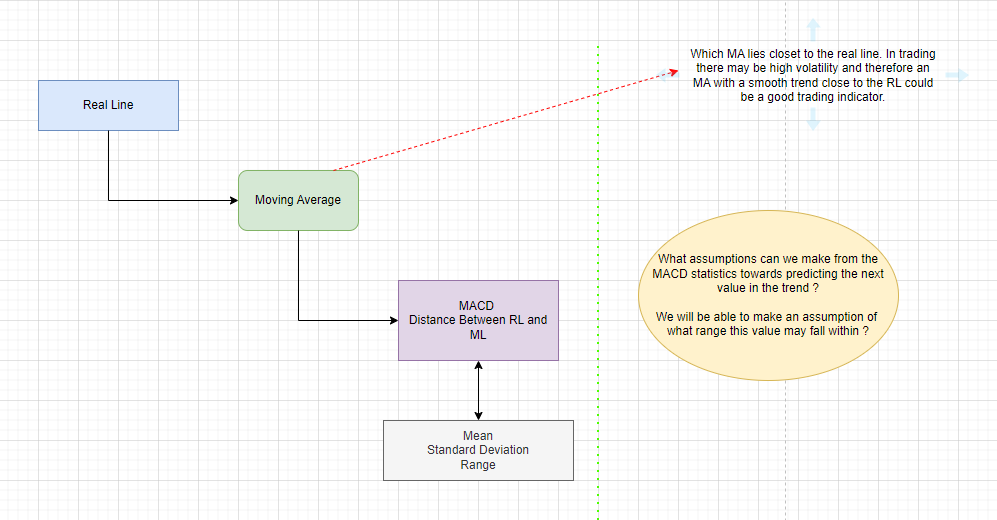


In [1]:
import numpy as np
import pandas as pd

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The below function will test how many values from the set of values fall within a range close to the Mean value of the (MA_distance_from_closing_price) feature.

What assumptions can we make on this ?

In [2]:
def threshold(greater,less,MA,distance_close_MA):
    """MA - Moving Average we want to run this test agaisnt"""
    """distance_close_MA - Feature we want to run test against"""
    """greater than represents the value we want to be greater than in the set & vice versa less"""
    """We want greater and less than to be close to the mean value of the MA in question"""
    
    global vals # -->> declare variable globally (callable outside function scope)
    vals = [] # empty list
    for value in df['close-change']:
        if (value >= greater) and (value <= less):
            vals.append(1)
        else:
            vals.append(0)
            
    # create new df
    global test
    test = df[['Close','close-change',MA,distance_close_MA]]
    test['threshold'] = vals
    print(test)
    
    # = visualy analyse countplot
    sns.countplot(test, x="threshold")
    
    #
    counts = test['threshold'].value_counts()
    percs = test['threshold'].value_counts(normalize=True).round(3)
    print(counts)
    print(percs)
 

#### Standard Deviation vs. Variance

Standard deviation and variance are two basic mathematical concepts that have an important place in various parts of the financial sector, from accounting to economics to investing. Both measure the variability of figures within a data set using the mean of a certain group of numbers. They are important to help determine volatility and the distribution of returns.

However, there are inherent differences between the two. While standard deviation measures the square root of the variance, the variance is the average of each point from the mean.

KEY TAKEAWAYS

- Standard deviation and variance are two key measures commonly used in the financial sector.
- Standard deviation is the spread of a group of numbers from the mean.
- The variance measures the average degree to which each point differs from the mean.
- While standard deviation is the square root of the variance, variance is the average of the squared difference of each data point from the mean.
- The two concepts are useful and significant for traders, who use them to measure market volatility.

#### Standard Deviation

Standard deviation is a statistical measurement that looks at how far a group of numbers is from the mean. Put simply, standard deviation measures how far apart numbers are in a data set.

This metric is calculated as the square root of the variance. This means you have to figure out the variation between each data point relative to the mean. Therefore, the calculation of variance uses squares because it weighs outliers more heavily than data that appears closer to the mean. This calculation also prevents differences above the mean from canceling out those below, which would result in a variance of zero.

But how do you interpret standard deviation once you figure it out? If the points are further from the mean, there is a higher deviation within the data. But if they are closer to the mean, there is a lower deviation. So the more spread out the group of numbers are, the higher the standard deviation.

#### Variation

A variance is the average of the squared differences from the mean. To figure out the variance, calculate the difference between each point within the data set and the mean. Once you figure that out, square and average the results. Using software like Excel can help you in this process.

For example, if a group of numbers ranges from one to 10, you get a mean of 5.5. If you square the differences between each number and the mean and find their sum, the result is 82.5. To figure out the variance:

Divide the sum, 82.5, by either N (population variance) or N-1 (sample variance).

In this example, N is 10 and N-1 would be 9.
- The result is a sample variance of 82.5/9 = 9.17 and a population variance of 8.25.
- Note that the standard deviation is the square root of the variance, so the standard deviation is about 3.03 for a sample data set. 
- The standard deviation for a population data set would be 2.87.

The sample formula is used when the data set represents a random sample from the entire population in question. The population formula is used when there is data from the entire population being studied or considered.

In [3]:
# Read in CSV data to Dataframe
df = pd.read_csv('TSLA.csv')

#
df['close-change'] = df['Close'].diff() # difference between the values in current row and previous row

# pythons built in moving average functions
df['SMA'] = df.iloc[:,4].rolling(window=10).mean() # -->> simple moving average.

# pythons in built Cumultive Moving Average function
df['CMA'] = df.iloc[:,4].expanding(min_periods=10).mean() # -->> cumaltive moving average

# Eponential Moving Average
df['EMA'] = df.iloc[:,4].ewm(span=40,adjust=False).mean() # -->> xxponential moving average

df

,Date,Open,High,Low,Close,Adj Close,Volume,close-change,SMA,CMA,EMA
0,2020-01-02,84.900002,86.139999,84.342003,86.052002,86.052002,47660500,NaN,NaN,NaN,86.052002
1,2020-01-03,88.099998,90.800003,87.384003,88.601997,88.601997,88892500,2.549995,NaN,NaN,86.176392
2,2020-01-06,88.094002,90.311996,88.000000,90.307999,90.307999,50665000,1.706002,NaN,NaN,86.377934
3,2020-01-07,92.279999,94.325996,90.671997,93.811996,93.811996,89410500,3.503997,NaN,NaN,86.740571
4,2020-01-08,94.739998,99.697998,93.646004,98.428001,98.428001,155721500,4.616005,NaN,NaN,87.310690
...,...,...,...,...,...,...,...,...,...,...,...
371,2021-06-23,632.000000,657.200012,630.039978,656.570007,656.570007,31099200,32.859985,618.295001,421.887091,627.441778
372,2021-06-24,674.989990,697.619995,667.609985,679.820007,679.820007,45982400,23.250000,625.265002,422.578600,629.996814
373,2021-06-25,689.580017,693.809998,668.700012,671.869995,671.869995,32496700,-7.950012,631.463000,423.245155,632.039408
374,2021-06-28,671.640015,694.700012,670.320007,688.719971,688.719971,21628200,16.849976,638.565997,423.953088,634.804314


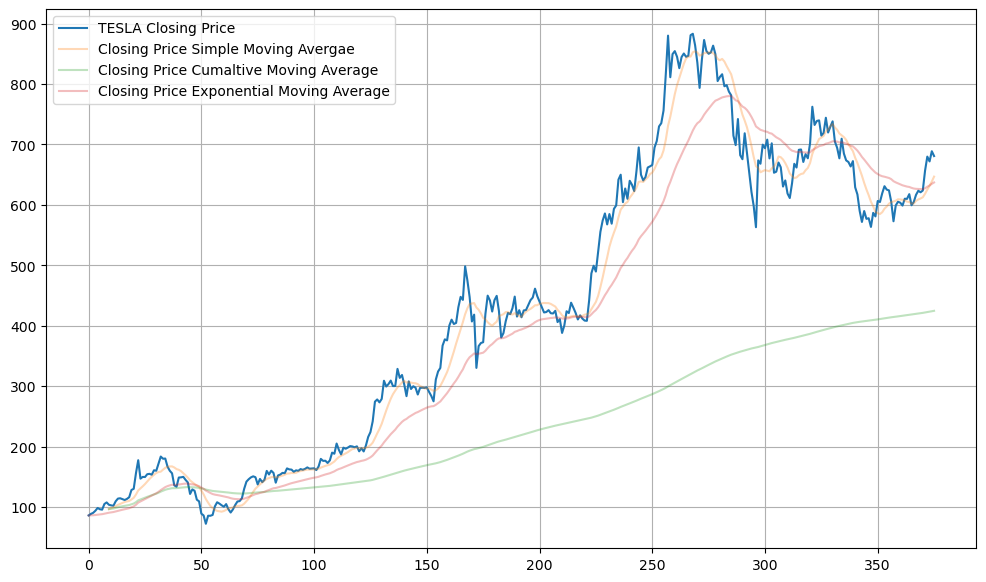

In [4]:
plt.figure(figsize=[12,7])
plt.grid(True)
plt.plot(df['Close'],label='TESLA Closing Price')
plt.plot(df['SMA'],label='Closing Price Simple Moving Avergae',alpha=0.3)
plt.plot(df['CMA'],label='Closing Price Cumaltive Moving Average',alpha=0.3)
plt.plot(df['EMA'],label='Closing Price Exponential Moving Average',alpha=0.3)
plt.legend(loc=2)

#  MACD (Moving Average Convergence Divergence)
Calculate the distance between the MA and RL data points.

In [5]:
df['distance_close_sma'] = df.Close - df.SMA
df['distance_close_CMA'] = df.Close - df.CMA
df['distance_close_EMA'] = df.Close - df.EMA
df.tail() # tail() end of dataframe

,Date,Open,High,Low,Close,Adj Close,Volume,close-change,SMA,CMA,EMA,distance_close_sma,distance_close_CMA,distance_close_EMA
371,2021-06-23,632.000000,657.200012,630.039978,656.570007,656.570007,31099200,32.859985,618.295001,421.887091,627.441778,38.275006,234.682916,29.128229
372,2021-06-24,674.989990,697.619995,667.609985,679.820007,679.820007,45982400,23.250000,625.265002,422.578600,629.996814,54.555005,257.241407,49.823193
373,2021-06-25,689.580017,693.809998,668.700012,671.869995,671.869995,32496700,-7.950012,631.463000,423.245155,632.039408,40.406995,248.624840,39.830587
374,2021-06-28,671.640015,694.700012,670.320007,688.719971,688.719971,21628200,16.849976,638.565997,423.953088,634.804314,50.153974,264.766883,53.915657
375,2021-06-29,684.650024,687.510010,675.890015,680.760010,680.760010,17381300,-7.959961,646.706000,424.636085,637.046055,34.054010,256.123925,43.713955


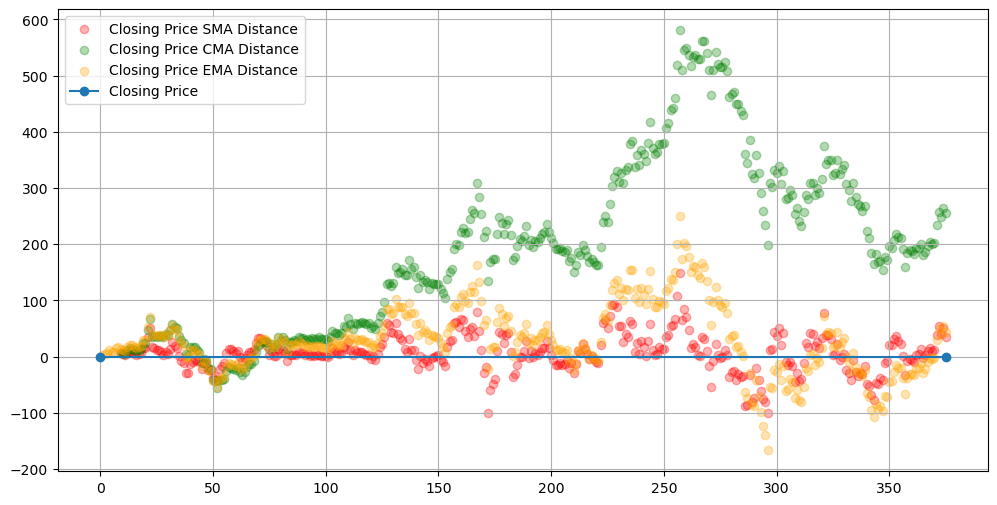

In [6]:
# data points which will sit along the x axis 
x1, y1 = [375,0], [0,0] 

plt.figure(figsize=[12,6])
plt.grid(True)
plt.scatter(df.index,df['distance_close_sma'],label='Closing Price SMA Distance',color='red',alpha=0.3)
plt.scatter(df.index,df['distance_close_CMA'],label='Closing Price CMA Distance',color='g',alpha=0.3)
plt.scatter(df.index,df['distance_close_EMA'],label='Closing Price EMA Distance',color='orange',alpha=0.3)
plt.plot(x1, y1,label='Closing Price', marker = 'o')
plt.legend(loc=2)

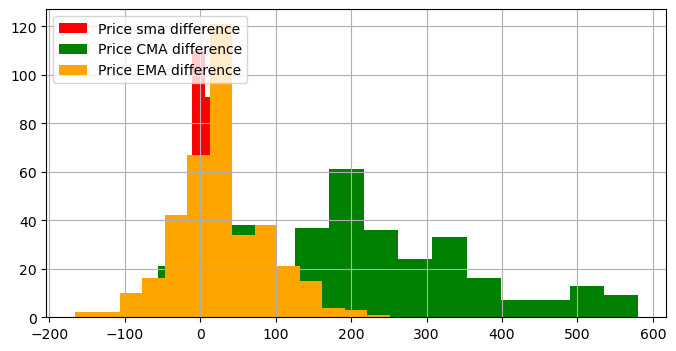

In [7]:
plt.figure(figsize=[8,4])
plt.grid(True)
plt.hist(df['distance_close_sma'], bins=14, label='Price SMA difference',color='r')
plt.hist(df['distance_close_CMA'], bins=14, label='Price CMA difference',color='g')
plt.hist(df['distance_close_EMA'], bins=14, label='Price EMA difference',color='orange')
plt.legend(loc=2)


In [8]:
print(df[['distance_close_sma','distance_close_CMA','distance_close_EMA']].describe())

       distance_close_sma  distance_close_CMA  distance_close_EMA
count          367.000000          367.000000          376.000000
mean             6.938799          192.774640           28.575489
std             32.472163          152.235198           60.102376
min           -100.904004          -56.628449         -166.765889
25%             -7.794406           44.346839           -4.490739
50%              6.037985          189.694789           22.177140
75%             23.072995          293.633726           55.774048
max            149.138019          580.461191          250.922762


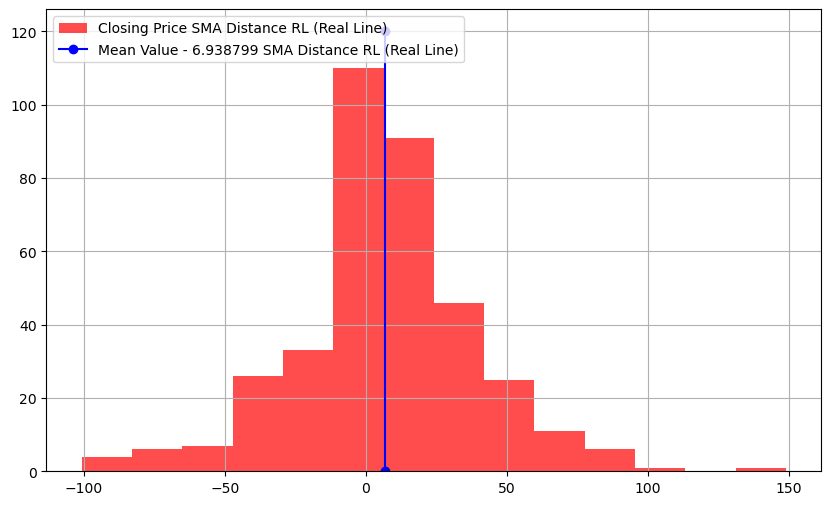

In [9]:
# data points which will sit along the x axis 
x1, y1 = [6.938799,6.938799], [120,0] 

plt.figure(figsize=[10,6])
plt.grid(True)
plt.hist(df['distance_close_sma'], bins=14, label='Closing Price SMA Distance RL (Real Line)',color='red',alpha=0.7)
plt.plot(x1, y1,label='Mean Value - 6.938799 SMA Distance RL (Real Line)', marker = 'o', color='blue')
plt.legend(loc=2)

### What use is this information ?

Based on the data we have gathered we can hyphotesize using the statistical information gathered from the SMA (distance betweem SMA and RL (real line) and make the following prediction. The next data point is likely to fall within a range of -100 (negative trend) and 149 (positive trend) at MOST based on this data. This is broad prediction.

SMA (distance) has the smallest mean value (6.93879892697548) wich is closest to zero and the small STD (32.472163177886955) compared to other MA's distances from RL. We can specify that it may be likely to fall within 6 or -6 distance of the RL.

The last closing price is 680.760010. Based on our investigation we can theorize the next data point to be within +6 or -6 of this value.

### Can we test this assumption ?

          Close  close-change         SMA  distance_close_sma  threshold
0     86.052002           NaN         NaN                 NaN          0
1     88.601997      2.549995         NaN                 NaN          1
2     90.307999      1.706002         NaN                 NaN          1
3     93.811996      3.503997         NaN                 NaN          1
4     98.428001      4.616005         NaN                 NaN          1
..          ...           ...         ...                 ...        ...
371  656.570007     32.859985  618.295001           38.275006          0
372  679.820007     23.250000  625.265002           54.555005          0
373  671.869995     -7.950012  631.463000           40.406995          0
374  688.719971     16.849976  638.565997           50.153974          0
375  680.760010     -7.959961  646.706000           34.054010          0

[376 rows x 5 columns]
0    230
1    146
Name: threshold, dtype: int64
0    0.612
1    0.388
Name: threshold, dtype: float6

C:\Users\dwatters\AppData\Local\Temp\ipykernel_2772\155162289.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['threshold'] = vals


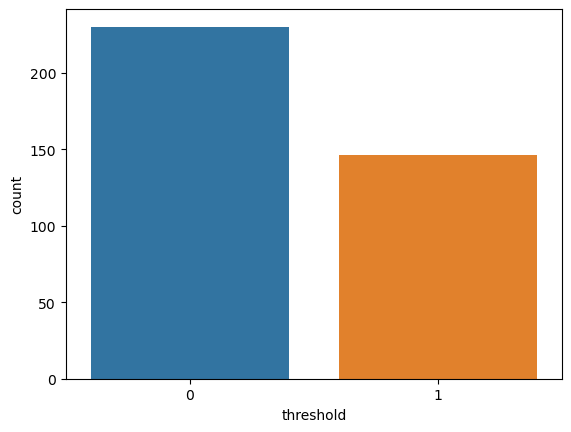

In [13]:
threshold(-6,6,'SMA','distance_close_sma')

### Mean 

The mean value is a mathematical term that describes the average of a sample. We have calculated the mean value of the moving averge distance from the RL.

#### What does this information tell us ?

In this instance the mean value 6.938799 calculated against the set of values of the moving averges distance from the RL. Most the data is clustered around 6.

#### Can we assume that most values will fall within the distance of 0 - 6 ?

According to our data 21% of the Closing Price values fall within a 0 - 6 range between values in current and previous row. Would the standard deviation be better threshold/measurement.

NOTE

We want to make the best prediction possible here.

          Close  close-change         SMA  distance_close_sma  threshold
0     86.052002           NaN         NaN                 NaN          0
1     88.601997      2.549995         NaN                 NaN          1
2     90.307999      1.706002         NaN                 NaN          1
3     93.811996      3.503997         NaN                 NaN          1
4     98.428001      4.616005         NaN                 NaN          1
..          ...           ...         ...                 ...        ...
371  656.570007     32.859985  618.295001           38.275006          0
372  679.820007     23.250000  625.265002           54.555005          1
373  671.869995     -7.950012  631.463000           40.406995          0
374  688.719971     16.849976  638.565997           50.153974          1
375  680.760010     -7.959961  646.706000           34.054010          0

[376 rows x 5 columns]
0    197
1    179
Name: threshold, dtype: int64
0    0.524
1    0.476
Name: threshold, dtype: float6

C:\Users\dwatters\AppData\Local\Temp\ipykernel_2772\155162289.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['threshold'] = vals


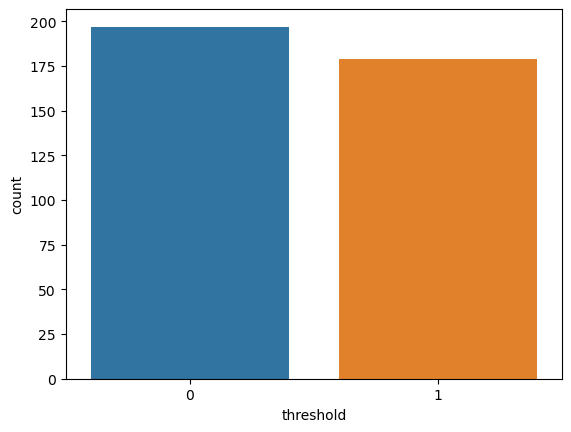

In [14]:
threshold(0,32,'SMA','distance_close_sma')

### Standard Deviation

Standard deviation is a statistical measurement that looks at how far a group of numbers is from the mean. Put simply, standard deviation measures how far apart numbers are in a data set. The standard deviation 32.472163 calculated against the set of values of the moving averges distance from the RL.

#### Can we assume that most values will fall within the distance of 0 - 32 ?

According to our data 47% of the Closing Price values fall within a 0 - 32 range between values in current and previous row. 
